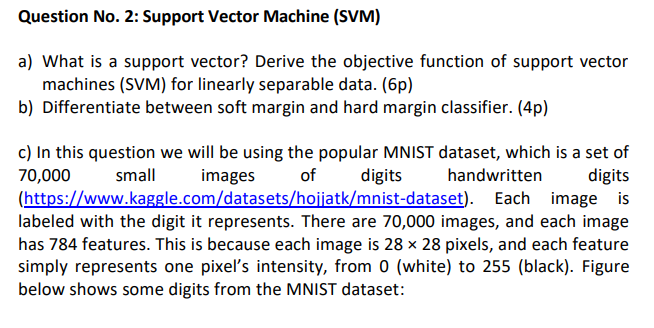

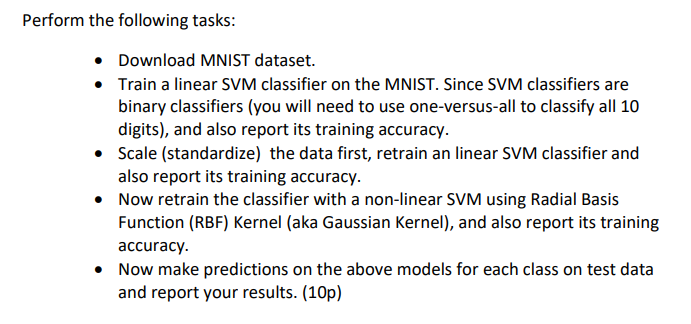

# **PART A**

**a) What is a support vector? Derive the objective function of support vector machines (SVM) for linearly separable data. (6p)**

A **support vector** is a concept used in Support Vector Machines (SVM), a supervised machine learning algorithm used for classification and regression tasks. In SVM, a support vector is a data point that is closest to the decision boundary (hyperplane) that separates the two classes in a binary classification problem. These support vectors are crucial because they play a key role in determining the position and orientation of the decision boundary.

The objective function of Support Vector Machines (SVM) is to find the hyperplane that maximizes the margin between two classes while minimizing the classification error.

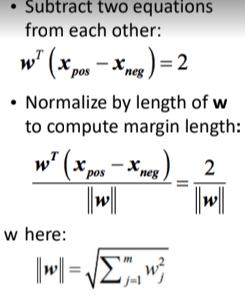

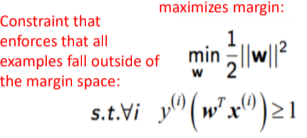

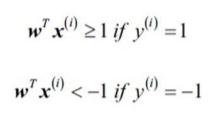

Maximize: 2 / ||w||

y_i * (w * x_i + b) ≥ 1 for all data points (i = 1, 2, ..., n)

In this objective function, "w" represents the weight vector of the hyperplane, and "b" is the bias term. The goal is to maximize the margin while ensuring that all data points are correctly classified. The margin is defined as 2/||w||, where ||w|| is the Euclidean norm (magnitude) of the weight vector. The condition y_i * (w * x_i + b) ≥ 1 enforces that all data points are correctly classified on the correct side of the hyperplane.

# **PART B**

**b) Differentiate between soft margin and hard margin classifier. (4p)**


**Hard margin classifiers** are ideal for data that is linearly separable, meaning that there exists a hyperplane that can perfectly separate the data points into two classes. However, in real-world datasets, it is often the case that the data is not linearly separable. In these cases, a hard margin classifier will either overfit the data or not be able to find a hyperplane that separates the data at all.

**Soft margin classifiers** address this problem by allowing for some misclassification. This is done by introducing slack variables, which allow data points to fall on the wrong side of the hyperplane or within the margin. Soft margin classifiers are more generalizable to new data than hard margin classifiers, but they are also more prone to overfitting if the hyperparameter C is not chosen carefully.

# **PART C**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

**LOAD THE MNIST DATASET**

In [2]:
mnist = datasets.load_digits()

**Splitting the dataset into test and training**

In [3]:
# Get the features and labels
X = mnist.data
y = mnist.target

# Set the seed for reproducibility (optional)
np.random.seed(42)

# Determine the number of samples for testing
test_size = int(0.2 * len(X))

# Create an array of random indices for the testing set
test_indices = np.random.choice(len(X), size=test_size, replace=False)

# Use the indices to extract the testing set
X_test = X[test_indices]
y_test = y[test_indices]

# Create the training set by excluding the testing set indices
X_train = np.delete(X, test_indices, axis=0)
y_train = np.delete(y, test_indices)


**Train a linear SVM classifier and report training accuracy**

In [4]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print("Linear SVM Training Accuracy:", train_accuracy)

Linear SVM Training Accuracy: 0.9895688456189151


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Scale (standardize) the data and retrain a linear SVM classifier**

In [5]:
# Scale (standardize) the data first, retrain a linear SVM classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svm_clf_scaled = LinearSVC(random_state=42)
svm_clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_clf_scaled.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_pred_scaled)
print("Linear SVM with Standardization Training Accuracy:", train_accuracy_scaled)

Linear SVM with Standardization Training Accuracy: 0.9944367176634215


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Retrain the classifier with a non-linear SVM using Radial Basis Function (RBF) Kernel (aka Gaussian Kernel), and report its training accuracy.**

In [6]:
svm_rbf_clf = SVC(kernel='rbf', random_state=42)
svm_rbf_clf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf_clf.predict(X_train_scaled)
train_accuracy_rbf = accuracy_score(y_train, y_pred_rbf)
print("RBF SVM Training Accuracy:", train_accuracy_rbf)

RBF SVM Training Accuracy: 0.9972183588317107


**Make predictions on the above models for each class on test data and report your results.**

In [7]:
y_pred_test_linear = svm_clf.predict(X_test)
test_accuracy_linear = accuracy_score(y_test, y_pred_test_linear)

X_test_scaled = scaler.transform(X_test)
y_pred_test_scaled = svm_clf_scaled.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_pred_test_scaled)

y_pred_test_rbf = svm_rbf_clf.predict(X_test_scaled)
test_accuracy_rbf = accuracy_score(y_test, y_pred_test_rbf)

print(f"Training accuracy of linear SVM classifier: {train_accuracy:.3f}")
print(f"Training accuracy of standardized data classifier: {train_accuracy_scaled:.3f}")
print(f"Training accuracy of non-linear SVM classifier: {train_accuracy_rbf:.3f}")
print(f"Test accuracy of linear SVM classifier: {test_accuracy_linear:.3f}")
print(f"Test accuracy of standardized data classifier: {test_accuracy_scaled:.3f}")
print(f"Test accuracy of non-linear SVM classifier: {test_accuracy_rbf:.3f}")

Training accuracy of linear SVM classifier: 0.990
Training accuracy of standardized data classifier: 0.994
Training accuracy of non-linear SVM classifier: 0.997
Test accuracy of linear SVM classifier: 0.961
Test accuracy of standardized data classifier: 0.953
Test accuracy of non-linear SVM classifier: 0.981
